no collapse operator, using sesolve
no collapse operator, using sesolve


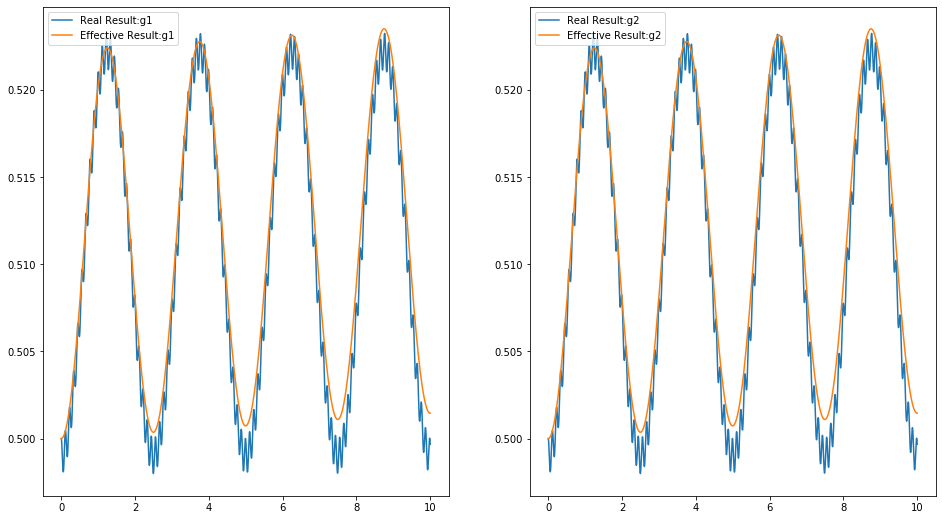

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g1 = basis(3,0)
g2 = basis(3,1)
e = basis(3,2)

Ee=10*2*np.pi
Eg1 = 0 * 2*np.pi
Eg2 = 0.4 *2*np.pi
omega = 1*2*np.pi
wa = Ee-Eg1
wa_n = Ee-Eg2
Delta = wa-omega
Delta_n = wa_n-omega
Omega = 0.4 * 2*np.pi #Omega should match the gap between Eg1 and Eg2

H = Delta * e * e.dag() + (Delta-Delta_n)*g2*g2.dag()+Omega/2.0*(g1+g2)*e.dag()+Omega/2.0*e*(g1.dag()+g2.dag())
H_eff = (Delta-Delta_n)*g2*g2.dag() - Omega**2.0/(4*Delta)*(g1*g2.dag()+g2*g1.dag())

psi0 = (g1 + g2).unit()
t = np.linspace(0,10,10000)
result = mesolve(H,psi0,t,[],[g1*g1.dag(),g2*g2.dag()])
result_eff = mesolve(H_eff,psi0,t,[],[g1*g1.dag(),g2*g2.dag()])

fig,ax = plt.subplots(1,2,figsize=(16,9))
ax[0].plot(t,result.expect[0],label='Real Result:g1')
ax[0].plot(t,result_eff.expect[0],label = 'Effective Result:g1')
ax[0].legend()
ax[1].plot(t,result.expect[0],label='Real Result:g2')
ax[1].plot(t,result_eff.expect[0],label = 'Effective Result:g2')
ax[1].legend()

no collapse operator, using sesolve
no collapse operator, using sesolve


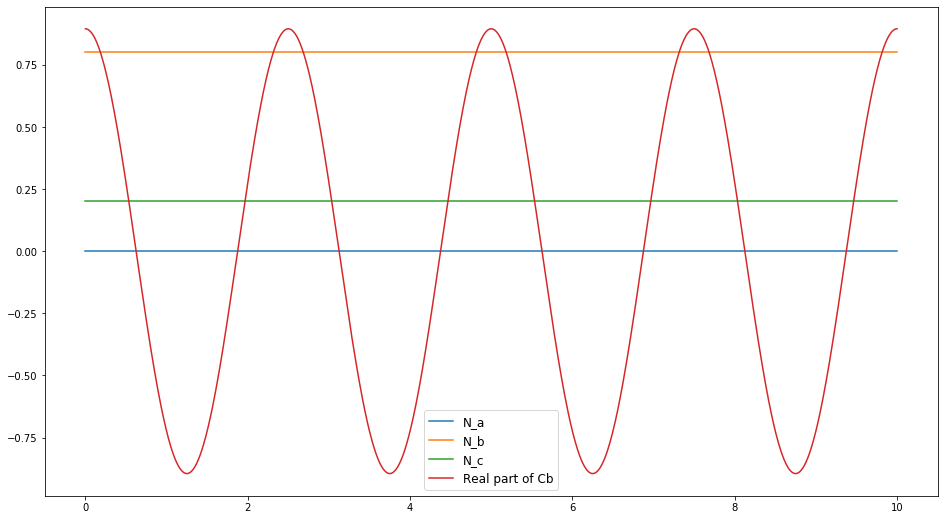

In [4]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = basis(3,0)
b = basis(3,1)
c = basis(3,2)
n_a = a*a.dag()
n_b = b*b.dag()
n_c = c*c.dag()
w_a = 0 * 2*np.pi
w_b = 0.4 * 2*np.pi
w_c = 1* 2*np.pi
Delta = 0.1* 2*np.pi
nu1 = w_a-w_b-Delta
nu2 = w_a-w_c-Delta
O_1 = 1* 2*np.pi
O_2 = 2* 2*np.pi
theta = np.arctan(O_1/O_2)

H0 = w_a*n_a+w_b*n_b+w_c*n_c
def Omega_1(t,args):
    return O_1/2.0*np.exp(-1j*nu1*t)
def Omega_1_dag(t,args):
    return O_1/2.0*np.exp(1j*nu1*t)
def Omega_2(t,args):
    return O_2/2.0*np.exp(-1j*nu2*t)
def Omega_2_dag(t,args):
    return O_2/2.0*np.exp(1j*nu2*t)
H=[H0,[a*b.dag(),Omega_1],[b*a.dag(),Omega_1_dag],[a*c.dag(),Omega_2],[c*a.dag(),Omega_2_dag]]
psi0 = np.cos(theta)*b-np.sin(theta)*c

t=np.linspace(0,10,1000)
result = mesolve(H,psi0,t,[],[n_a,n_b,n_c])
fig,ax = plt.subplots(figsize=(16,9))
plt.plot(t,result.expect[0],label='N_a')
plt.plot(t,result.expect[1],label='N_b')
plt.plot(t,result.expect[2],label='N_c')
result_state = mesolve(H,psi0,t)
result_b = [b.overlap(t.dag()) for t in result_state.states]
plt.plot(t,np.real(result_b),label='Real part of Cb')

plt.legend(fontsize='large')

no collapse operator, using sesolve


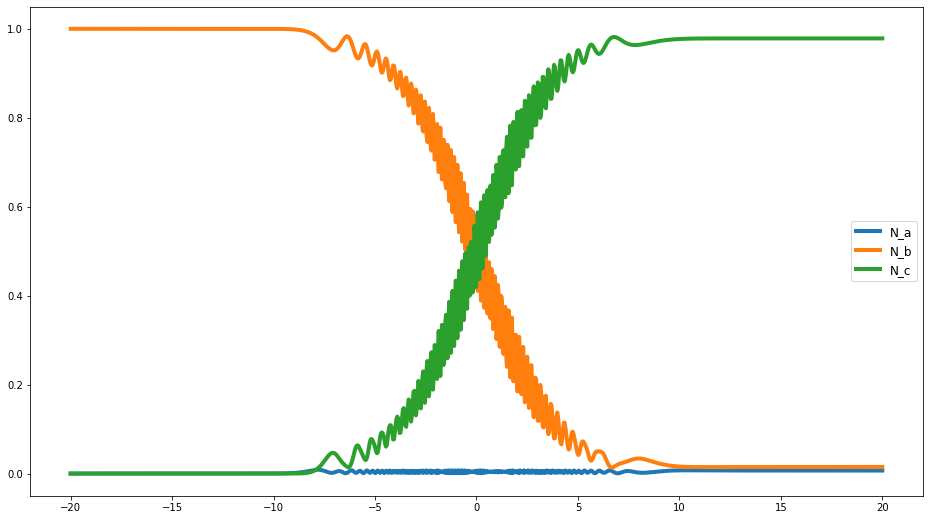

In [5]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = basis(3,0)
b = basis(3,1)
c = basis(3,2)
n_a = a*a.dag()
n_b = b*b.dag()
n_c = c*c.dag()
w_a = 0 * 2*np.pi
w_b = 0.4 * 2*np.pi
w_c = 1* 2*np.pi
Delta = 0.1* 2*np.pi
nu1 = w_a-w_b-Delta
nu2 = w_a-w_c-Delta
O_1 = 10* 2*np.pi
O_2 = 10* 2*np.pi
theta = np.arctan(O_1/O_2)
Delta_t = 1.1
T=4

H0 = w_a*n_a+w_b*n_b+w_c*n_c
def Gas_1(t):
    return np.exp(-(t-Delta_t)**2/T**2)
def Gas_2(t):    
    return np.exp(-(t+Delta_t)**2/T**2)
def Omega_1(t,args):
    return Gas_1(t)*O_1/2.0*np.exp(-1j*nu1*t)
def Omega_1_dag(t,args):
    return Gas_1(t)*O_1/2.0*np.exp(1j*nu1*t)
def Omega_2(t,args):
    return Gas_2(t)* O_2/2.0*np.exp(-1j*nu2*t)
def Omega_2_dag(t,args):
    return Gas_2(t)*O_2/2.0*np.exp(1j*nu2*t)
H=[H0,[a*b.dag(),Omega_1],[b*a.dag(),Omega_1_dag],[a*c.dag(),Omega_2],[c*a.dag(),Omega_2_dag]]
psi0 = b

t=np.linspace(-20,20,1000)
result = mesolve(H,psi0,t,[],[n_a,n_b,n_c])
fig,ax = plt.subplots(figsize=(16,9))
plt.plot(t,result.expect[0],label='N_a',linewidth=4.0)
plt.plot(t,result.expect[1],label='N_b',linewidth=4.0)
plt.plot(t,result.expect[2],label='N_c',linewidth=4.0)
plt.legend(fontsize='large')

![optomech](img/optomech.png)

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 

<img src="./optomech.png", width=320, heigth=240>

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

In [14]:
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt  

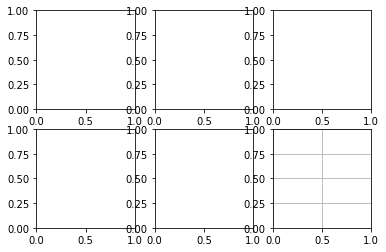

In [18]:

from matplotlib import pyplot as plt
 
fig = plt.figure()
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234) 
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)
plt.grid(True)
plt.show()


In [19]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "./optomech.png")

In [20]:
Nc = 10 #Number of cavity states

In [21]:
Nm = 80 #number of mech states

In [22]:
kappa = 0.3 #Cavity damping rate

In [23]:
E = 0.1 # Driving Amplitude of laser

In [25]:
g0 = 2.4*kappa #Coupling strength

In [26]:
Qm = 1e4  # Mech qualit factor

In [27]:
gamma = 1/Qm #Mech damping rate

In [28]:
n_th = 1 # Mech bath temperature

In [29]:
delta = -0.43 #Detuning Operators

In [30]:
a = tensor(destroy(Nc), qeye(Nm))

In [31]:
b = tensor(qeye(Nc), destroy(Nm))

In [32]:
num_b = b.dag()*b

In [33]:
num_a = a.dag()*a

In [34]:
psi0 = tensor(basis(Nc,5),basis(Nm,10))

In [35]:
ro0 = psi0*psi0.dag()

In [36]:
#Hamiltonian

In [37]:
H = -delta*(num_a)+num_b+g0*(b.dag()+b)*num_a + E*(a.dag()+a)

In [38]:
#Collapse operator

In [39]:
cc = np.sqrt(kappa)*a

In [40]:
cm =np.sqrt(gamma*(1.0+n_th))*b

In [41]:
cp = np.sqrt(gamma*n_th)*b.dag()

In [42]:
c_ops = [cc,cm,cp]

In [43]:
t_list  = np.linspace(0,20,1000)

In [45]:
times = 10

In [ ]:
result  = mesolve(H,ro0,t_list,c_ops,[num_b,num_a])